# Set-up

In [1]:
# # Preamble

# ## Import colours

# In[1]:
# Lists of colors for plots

c0 = (0.76, 0.76, 0.76)
c1 = (1.00, 0.18, 0.33);
c2 = (1.00, 0.23, 0.19);
c3 = (1.00, 0.58, 0.00);
c4 = (1.00, 0.80, 0.00);
c5 = (0.30, 0.85, 0.39);
c6 = (0.35, 0.78, 0.98);
c7 = (0.20, 0.67, 0.86);
c8 = (0.00, 0.48, 1.00);
c9 = (0.35, 0.34, 0.84);
c10 = (0.00, 0.31, 0.57);
c11 = (0.12, 0.29, 0.69);
c12 = (0.17, 0.17, 0.42);
c13 = (1.00, 1.00, 1.00);
c14 = (0.77, 0.04, 0.00);

ios_colors=[c5, c1, c3, c7, c2, c6, c4, c9, c8]

def to_rgb_frac(vect):
    return (float(vect[0])/255, float(vect[1])/255, float(vect[2])/255)

color_list=list(map(to_rgb_frac, [(166,206,227),(178,223,138),(51,160,44),(31,120,180)]))

# Lists of colors for plots

def to_rgb_frac(vect):
    return (float(vect[0])/255, float(vect[1])/255, float(vect[2])/255)

rb_div_5=list(map(to_rgb_frac, [(202,0,32),
(244,165,130),
(247,247,247),
(146,197,222),
(5,113,176)]))

qualitative_10=list(map(to_rgb_frac, [(166,206,227),
(31,120,180),
(178,223,138),
(51,160,44),
(251,154,153),
(227,26,28),
(253,191,111),
(255,127,0),
(202,178,214),
(106,61,154)]))


# <img src="Qualitative_10.png">
# <img src="RB_DIV_5.png">



# ## Import packages

# In[2]:

#from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# imported packages
get_ipython().run_line_magic('matplotlib', 'inline')
import datetime
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as plticker
import bisect
import copy
import json
import csv
import ast
import pylab as pl
import time
from scipy import integrate
from scipy.integrate import quad, dblquad
#import urllib2
#import io
#import os
#import re

# from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp1d
from scipy.special import expi
import time


In [2]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'

In [3]:
#line plot for predicted ratio EXPONENTIAL POWER


b = 0.33263159 #from distribution of s across 10 commonly mutated CH genes (as above)
d = 0.00034204 #from distribution of s across 10 commonly mutated CH genes (as above)
s_max = 0.16122675 #from distribution of s across 10 commonly mutated CH genes (as above)

N = 9.39358404e+04
s_peak = 0.0







In [9]:
# Functions for calculating prevalence of double mutants (i.e. 2 mutations in 1 clone)



# def mu_of_s(b, d, s, u, s_max): #mutation rate across an exponential distribution of s
#     return (u/normalization)*np.exp(-((abs(s))/d)**b)
#     if abs(s-0.1)<0.1:
#         result=u
#     else:
#         result=0
#     return result
from scipy.integrate import simps

def expected_density_hitchhiker_mutants_s_single(t, l, s1, b, d, mu_ben, mu_neu, s_max): #s1 = fitness of 1st mutation, s2 = fitness of 2nd mutation
    combined_s=s1#sum of the fitness effects of the 2 mutations
    s_peak = 0.0
    weight_s= lambda s: np.exp(-((abs(s-s_peak))/d)**b)
    normalization=integrate.quad(weight_s, 0.0, s_max)[0]
    mu1 = mu_ben*np.exp(-((abs(s1))/d)**b)/normalization
     #mutation rate for 1st mutation with exponential distribution of s
    mu2 = mu_neu #mutation rate for 2nd mutation with exponential distribution of s
    n = (2*N*np.exp(l))/(1-2*np.exp(l))
    psi = (np.exp(s1*t)-1)/s1
    
    expected_density = N*mu1*mu2*np.exp(l)/((2*N*np.exp(l)/(1-2*np.exp(l)))*s1+1)*\
    (np.exp(s1*t)/((2*N*np.exp(l)/(1-2*np.exp(l)))*s1+1)-1 +s1*t-np.log((2*N*np.exp(l)/(1-2*np.exp(l)))*s1+1)  )*(2*N/(1-2*np.exp(l))+4*N*np.exp(l)/(1-2*np.exp(l))**2)
        

    for i in range(len(s1)):
        if expected_density[i]<0:
            expected_density[i] = 0
        
    return (expected_density)#     


    
def after_integration_wrt_s1(t, l, b, d, mu_ben, mu_neu, s_max): #integrate over exponential distribution of s (for 1st mutation)
    int_limit=np.linspace(0, s_max, 1000)
    return integrate.simps(expected_density_hitchhiker_mutants_s_single(t, l, int_limit, b, d, mu_ben, mu_neu, s_max), int_limit)
 
def after_integration_wrt_t(l, b, d, mu_ben, mu_neu, s_max, t_max, t_min): #integrate over exponential distribution of s (for 1st mutation)
#     int_limit=np.linspace(t_min, t_max, 1000)
#     return integrate.simps(1/(t_max-t_min)*after_integration_wrt_s1(int_limit, l, b, d, mu_ben, mu_neu, s_max), int_limit)
    return integrate.quad(lambda t: 1/(t_max-t_min)*after_integration_wrt_s1(t, l, b, d, mu_ben, mu_neu, s_max), t_min, t_max)[0]
#     t_eff=t_max-3.5
#     if t_max==31:
#         t_eff=(31-t_min)/2
#     if t_max==93:
#         t_eff=(93-81)/2
#     return after_integration_wrt_s1(t_eff, l, b, d, mu_ben, mu_neu, s_max)  # don't integrate to save time
    
def expected_number(b, d, mu_ben, mu_neu, s_max, t_max, f_min, t_min): #integrate over exponential distribution of s (for 1st mutation)
#     int_lim=np.linspace(np.log(f_min), np.log(0.49), 1000)
#     return integrate.simps(after_integration_wrt_t(int_lim, b, d, mu_ben, mu_neu, s_max, t_max, t_min), int_lim)
    return integrate.quad(lambda l: after_integration_wrt_t(l, b, d, mu_ben, mu_neu, s_max, t_max, t_min), np.log(f_min), np.log(0.49))[0]

def prevalence_any_num_hitch_mutants(mu):
    return (1-np.exp(-mu))  #returns any number but zero hitchhikers

def prevalence_one_hitch_mutants(mu):
    return np.exp(-mu)*(mu)

def prevalence_two_hitch_mutants(mu):
    return np.exp(-mu)*(mu)**2/2

def prevalence_three_or_more_hitch_mutants(mu):
    result = 1-np.exp(-mu)-mu*np.exp(-mu)-np.exp(-mu)*mu**2/2
    return result


In [79]:
# #run the integration once and store the values
# expected_number=[expected_number(b, d, mu_ben, mu_neu, s_max, t_max, f_min) for t_max in age_less_than]

In [116]:
expected_number_list

[5.432339472214183e-06,
 5.046632446533519e-06,
 1.935036682200399e-06,
 4.996637960774142e-07,
 2.76329324622794e-06,
 1.5973654297154506e-05,
 0.001126408483539801,
 1.5385150072652628e-05,
 0.0006327641138291253,
 129.81607739877248,
 556.3846971096954,
 19131.05782256577]

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


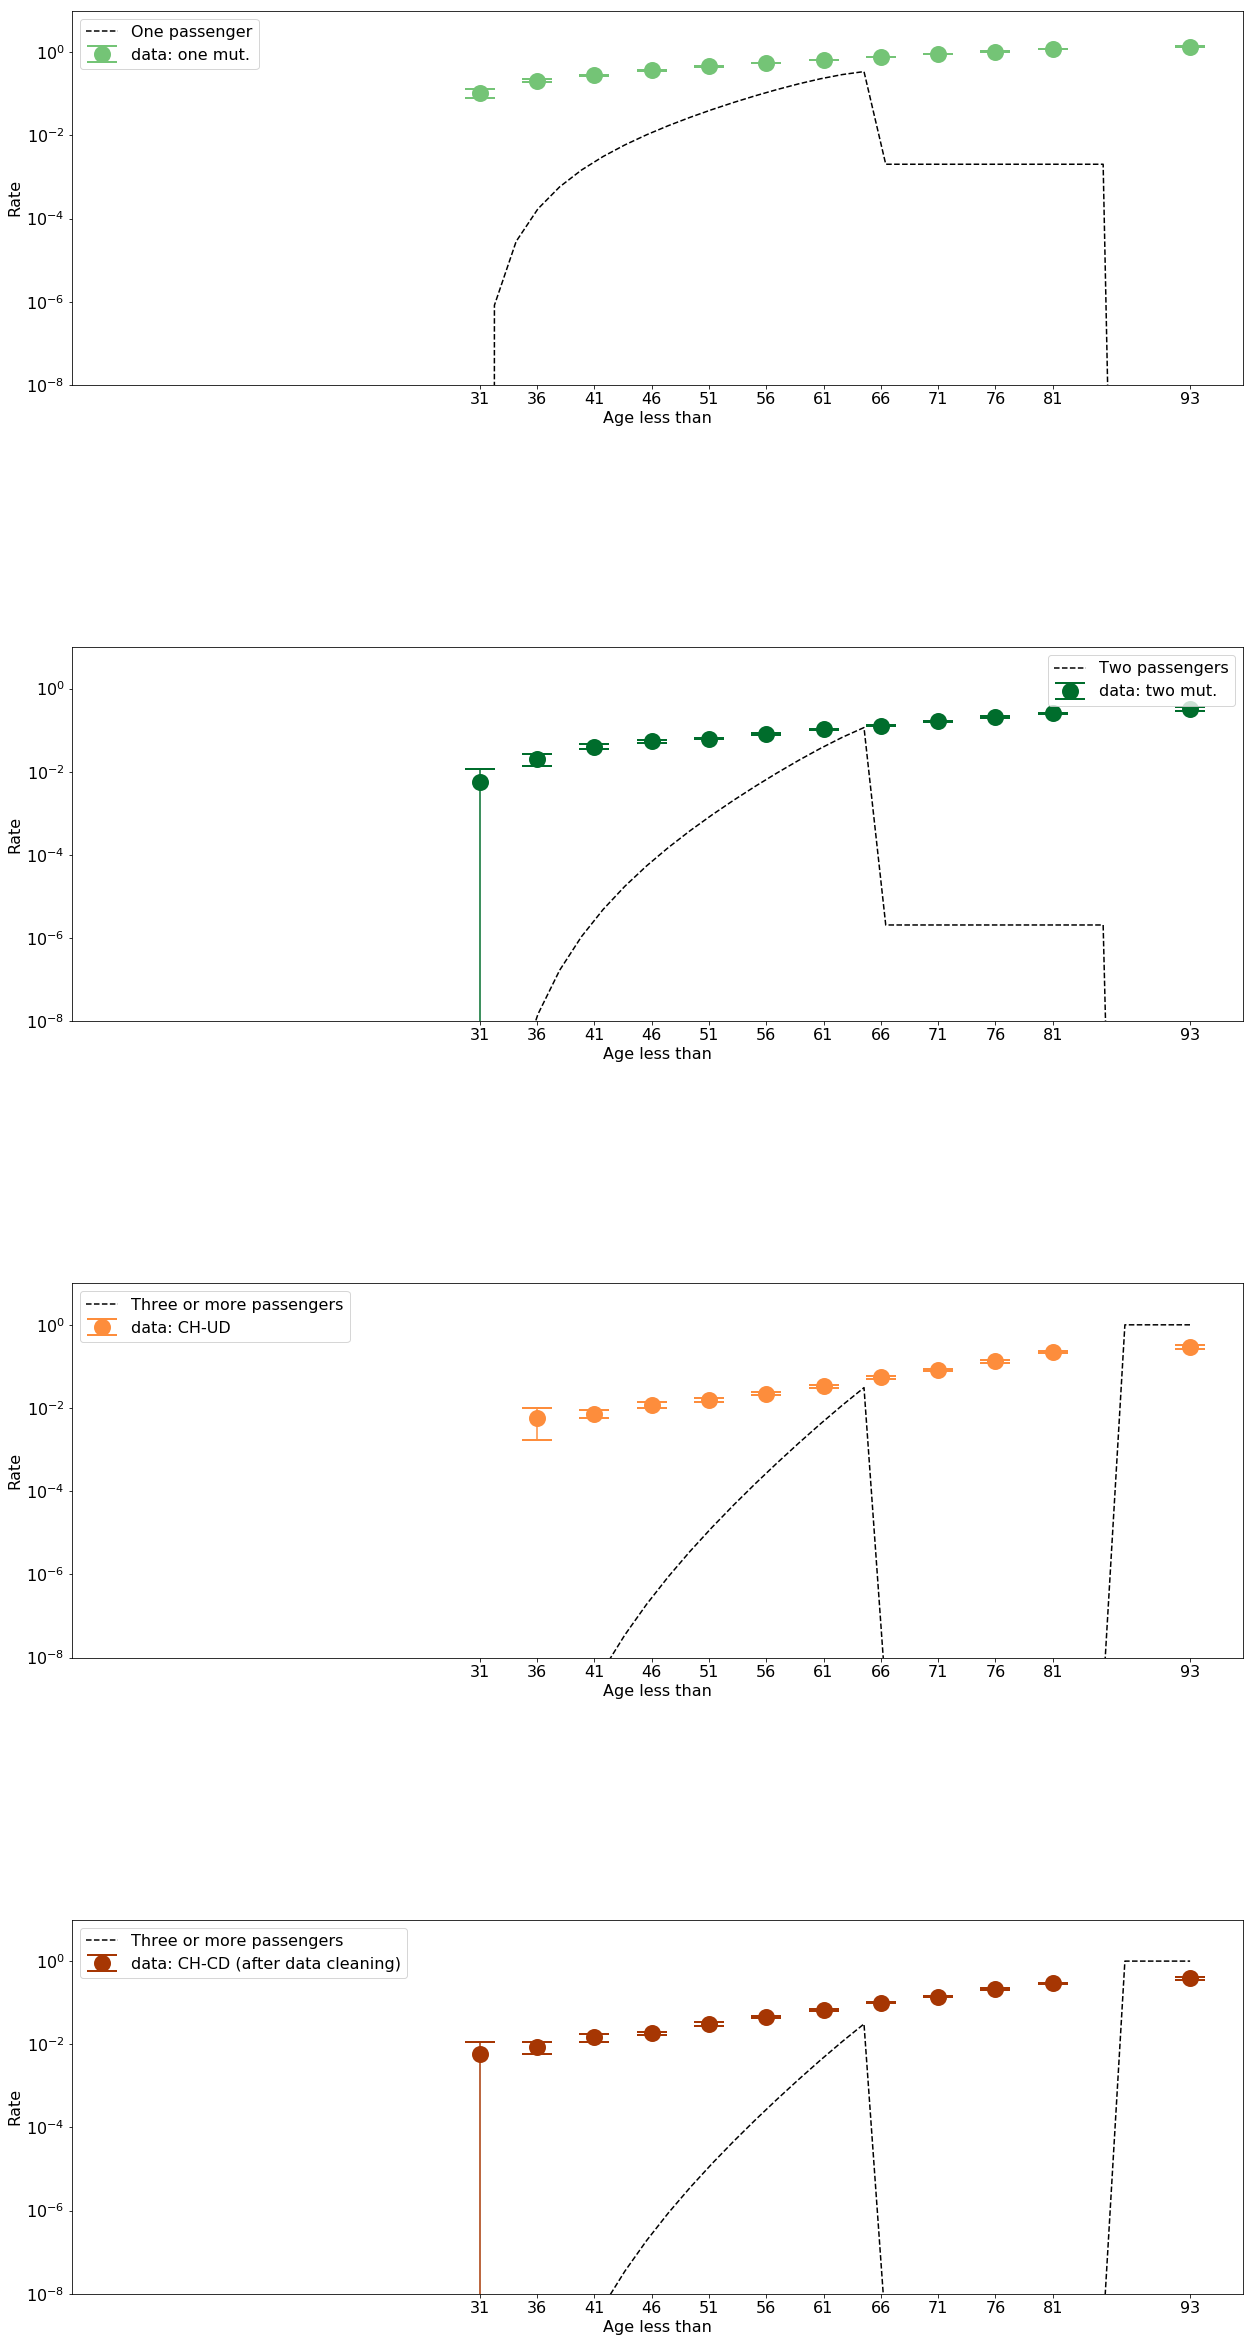

In [13]:
#reduction included: single-valued landscape
from scipy import integrate
from scipy.integrate import quad


num_div=1.5
N=10**5
mu_ben=10**-2
mu_neu=10**-4
t_min=19*num_div
f_min=0.05
#f_min=0.119


plt.close('all')
f, ax1 = plt.subplots(4, 1, figsize=(7*3,7*6))
plt.subplots_adjust(hspace = 0.7,wspace=0.35)  
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)
#rate of co-occurrence using single-valued s

one_passenger_data=[18/174, 36/349, 48/661, 93/1081, 120/1303, 148/1597, 190/1725, 187/1608, 141/1105, 77/600, 57/355, 13/73]
two_passenger_data=[1/174, 5/349, 13/661, 15/1081, 12/1303, 28/1597, 41/1725, 40/1608, 36/1105, 29/600, 15/355, 5/73]
three_passenger_or_more_no_driver_data=[0, 2/349, 1/661, 5/1081, 5/1303, 10/1597, 19/1725, 35/1608, 32/1105, 29/600, 32/355, 5/73]
three_mutations_or_more_with_driver_data=[1/174, 1/349, 4/661, 4/1081, 17/1303, 22/1597, 39/1725, 53/1608, 44/1105, 46/600, 26/355, 7/73]
age_less_than=[31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 93]

#plot rate of people with (any number of) passengers
three_mutations_or_more_with_driver_data=[1/174, 1/349, 4/661, 4/1081, 17/1303, 22/1597, 39/1725, 53/1608, 44/1105, 46/600, 26/355, 7/73]


ymin=10**-8
ymax=10**1
age_range=np.linspace(0, 93, 50)

#run the integration once and store the values
expected_number_list=[expected_number(b, d, mu_ben, mu_neu, s_max, t_max*num_div, f_min, t_min) for t_max in age_range]

theory_one_hitch_mutants = [prevalence_one_hitch_mutants(expected_number_list[i])      for i in range(len(age_range))]  

theory_two_hitch_mutants = [prevalence_two_hitch_mutants(expected_number_list[i])   for i in range(len(age_range))]   

theory_3_passenger_or_more_no_driver = [prevalence_three_or_more_hitch_mutants(expected_number_list[i])      for i in range(len(age_range))]  

def cumulative(position, *args):
    extracted_list=args[0:position+1]
    cumulative_at_position=sum(extracted_list)
    return cumulative_at_position

base_number=[174,349,661,1081,1303,1597,1725,1608,1105,600,355,73]

    
    
one_passenger_data_cum=[cumulative(i, *one_passenger_data) for i in range(len(age_less_than))]
two_passenger_data_cum=[cumulative(i, *two_passenger_data) for i in range(len(age_less_than))]
three_passenger_or_more_no_driver_data_cum=[cumulative(i, *three_passenger_or_more_no_driver_data) for i in range(len(age_less_than))]
three_mutations_or_more_with_driver_data_cum=[cumulative(i, *three_mutations_or_more_with_driver_data) for i in range(len(age_less_than))]


Errors_one_passenger=[(one_passenger_data[position]*base_number[position])**0.5/base_number[position] for position in range(len(age_less_than))]
Errors_two_passenger=[(two_passenger_data[position]*base_number[position])**0.5/base_number[position] for position in range(len(age_less_than))]
Errors_three_passenger_or_more_no_driver=[(three_passenger_or_more_no_driver_data[position]*base_number[position])**0.5/base_number[position] \
                                          for position in range(len(age_less_than))]
Errors_three_mutations_or_more_with_driver_data=[(three_mutations_or_more_with_driver_data[position]*base_number[position])**0.5/base_number[position] \
                                                 for position in range(len(age_less_than))]


ax1[0].plot(age_range, theory_one_hitch_mutants, color='black', linestyle='--', label='One passenger')
ax1[1].plot(age_range, theory_two_hitch_mutants , color='black', linestyle='--', label='Two passengers')
ax1[2].plot(age_range,theory_3_passenger_or_more_no_driver, color='black', linestyle='--', label='Three or more passengers')
ax1[3].plot(age_range,theory_3_passenger_or_more_no_driver, color='black', linestyle='--', label='Three or more passengers')


ax1[0].errorbar(age_less_than, one_passenger_data_cum,  yerr=Errors_one_passenger, color=green3, fmt='o' ,
         mec=green3, mfc=green3, ms=15, capsize=15, mew=2, label='data: one mut.')
ax1[0].legend()
ax1[0].set_xlabel('Age less than')
ax1[0].set_ylabel('Rate')
ax1[0].set_xticks(age_less_than);                                                                                            
ax1[0].set_xticklabels(age_less_than);
ax1[0].set_ylim(ymin,ymax) 
ax1[0].set_yscale('log')
ax1[1].errorbar(age_less_than, two_passenger_data_cum,  yerr=Errors_two_passenger, color=green5, fmt='o' ,
         mec=green5, mfc=green5, ms=15, capsize=15, mew=2, label='data: two mut.')
ax1[1].legend()
ax1[1].set_ylim(ymin,ymax) 
ax1[1].set_xlabel('Age less than')
ax1[1].set_ylabel('Rate')
ax1[1].set_xticks(age_less_than);                                                                                            
ax1[1].set_xticklabels(age_less_than);
ax1[1].set_yscale('log')
ax1[2].errorbar(age_less_than, three_passenger_or_more_no_driver_data_cum,  yerr=Errors_three_passenger_or_more_no_driver, color=orange3, fmt='o' ,
         mec=orange3, mfc=orange3, ms=15, capsize=15, mew=2, label='data: CH-UD')
ax1[2].legend()
#ax1[2].set_ylim(0,1) 
ax1[2].set_xlabel('Age less than')
ax1[2].set_ylabel('Rate')
ax1[2].set_xticks(age_less_than);                                                                                            
ax1[2].set_xticklabels(age_less_than);
ax1[2].set_ylim(ymin,ymax) 
ax1[2].set_yscale('log')
ax1[3].errorbar(age_less_than, three_mutations_or_more_with_driver_data_cum,  yerr=Errors_three_mutations_or_more_with_driver_data, color=orange5, fmt='o' ,
         mec=orange5, mfc=orange5, ms=15, capsize=15, mew=2, label='data: CH-CD (after data cleaning)')  #after data cleaning getting rid of unqualified cases
ax1[3].legend()
ax1[3].set_ylim(ymin,ymax) 
ax1[3].set_xlabel('Age less than')
ax1[3].set_ylabel('Rate')
ax1[3].set_xticks(age_less_than);                                                                                            
ax1[3].set_xticklabels(age_less_than);
ax1[3].set_yscale('log')

ax1[0].set_title('')









    
plt.savefig('Genovese_all_data_assumed_hitch_1_half_div_a_year_uben_minus6_power_DFE.pdf', bbox_inches='tight')

In [113]:
expected_number_list

[0.000208223001954018,
 0.0016513552737238914,
 0.007796898073641546,
 0.00686549207901346,
 0.11850273777959364,
 0.08796046746605704,
 0.018175310407685965,
 7.393053247399702,
 30.716422695774586,
 129.81607739690645,
 556.3846971062435,
 19131.057822607243]

Total participant number is  17182
[0.00018309205154005045, 0.000663059734177409, 0.0010649955403405124, 0.004461241521681688, 0.009708737864077669]


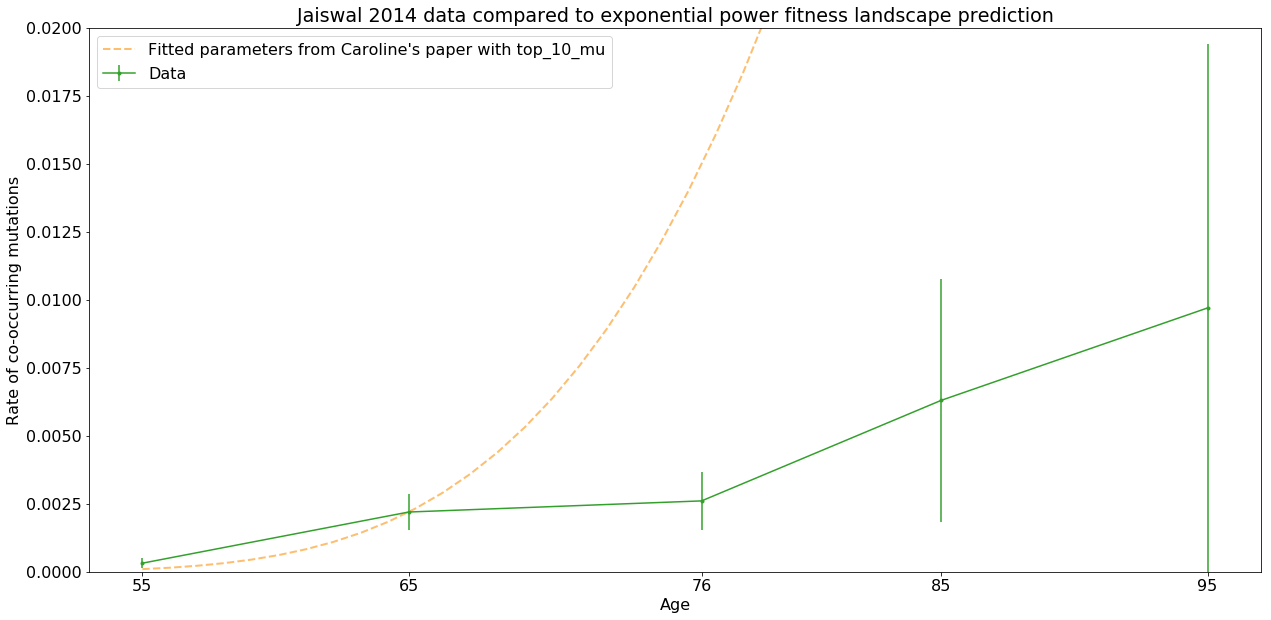

In [12]:
#rate of co-occurrence based on EXPONENTIAL POWER DISTRIBUTION

datafilename='all_studies_not_trimmed_all_genes_multiple_mutations.csv'
age_data='Jaiswal_age_data.csv'

target_study='Jaiswal 2014'
VAF_lim= 0.0556
pop_size=10**5
top_4_u=10**-6
pseudo_infinity=10**8
u=top_4_u
det_lim= VAF_lim*2
n_min=pop_size*det_lim
n_max=pseudo_infinity

b = 1.50725533e-01
d = 8.98941675e-09
s_max = 1.47963832e-01
s_peak=0
top_10_mu = 7.1039709e-05
u= top_10_mu
pop_size=9.39358404e+04


def nu(t,u): 
    #normalized_rho_s= lambda s: (1.0/normalization[0])*np.exp(-((abs(s-s_peak))/d)**b)
    before_wrt_n= lambda n, s: pop_size*u*((1.0/normalization[0])*np.exp(-((abs(s-s_peak))/d)**b))/n*np.exp(-n/((np.exp(s*t)-1)/s))
    before_wrt_l_log= lambda l, s: pop_size*u*np.exp(l)*((1.0/normalization[0])*np.exp(-((abs(s-s_peak))/d)**b))/np.exp(l)*np.exp(-np.exp(l)/((np.exp(s*t)-1)/s))
    #nu = integrate.dblquad(before_wrt_n, n_min, n_min*4, lambda s: 0, lambda s: s_max)[0]
    nu = integrate.dblquad(before_wrt_l_log, 0, s_max, lambda s: np.log(n_min), lambda s: np.log(n_max))[0]
    return nu


counts_less60_ppl_with_at_least_another_coexisting_mutation=0
counts_60_ppl_with_at_least_another_coexisting_mutation=0
counts_70_ppl_with_at_least_another_coexisting_mutation=0
counts_80_ppl_with_at_least_another_coexisting_mutation=0
counts_great90_ppl_with_at_least_another_coexisting_mutation=0

base_number_less60=0
base_number_60=0
base_number_70=0
base_number_80=0
base_number_great90=0



with open(datafilename) as data:
    reader = csv.reader(data,delimiter=',')
    #reader = csv.DictReader(data)
    for row in reader:
        try:
            #cannot assign without elliciting IndexError 
            Participant_ID= row[1]
            age=float(row[2])
            number_of_mutations= float(row[3])
            

            if row[0] == target_study:
                if row[9]!='':
                    if age<60:
                        counts_less60_ppl_with_at_least_another_coexisting_mutation=counts_less60_ppl_with_at_least_another_coexisting_mutation+1
                    elif 60<=age<70:
                        counts_60_ppl_with_at_least_another_coexisting_mutation=counts_60_ppl_with_at_least_another_coexisting_mutation+1
                    elif 70<=age<80:
                        counts_70_ppl_with_at_least_another_coexisting_mutation=counts_70_ppl_with_at_least_another_coexisting_mutation+1
                    elif 80<=age<90:
                        counts_80_ppl_with_at_least_another_coexisting_mutation=counts_80_ppl_with_at_least_another_coexisting_mutation+1
                    elif age>=90:
                        counts_great90_ppl_with_at_least_another_coexisting_mutation=counts_great90_ppl_with_at_least_another_coexisting_mutation+1
                    else:
                        print('age is ', age)
                                         
        except: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
#        cc=cc+1



with open(age_data) as data:
    reader = csv.reader(data,delimiter=',')
    #reader = csv.DictReader(data)
    for row in reader:
        try:
            age=float(row[0])
            if age != 0:
                if age<60:
                    base_number_less60=base_number_less60+1
                elif 60<=age<70:
                    base_number_60=base_number_60+1
                elif 70<=age<80:
                    base_number_70=base_number_70+1
                elif 80<=age<90:
                    base_number_80=base_number_80+1
                elif age>=90:
                    base_number_great90=base_number_great90+1
        except:
            pass

                    
print('Total participant number is ', (base_number_less60+base_number_60+base_number_70+base_number_80+base_number_great90) )
                    
#avoid dividing by 0
if base_number_less60==0:
    base_number_less60=1
if base_number_60==0:
    base_number_60=1
if base_number_70==0:
    base_number_70=1
if base_number_80==0:
    base_number_80=1
if base_number_great90==0:
    base_number_great90=1

    
#get the divided counts first   
Base_numbers=[base_number_less60, base_number_60, base_number_70, base_number_80, base_number_great90] 
counts=[counts_less60_ppl_with_at_least_another_coexisting_mutation,counts_60_ppl_with_at_least_another_coexisting_mutation,\
        counts_70_ppl_with_at_least_another_coexisting_mutation,counts_80_ppl_with_at_least_another_coexisting_mutation,\
        counts_great90_ppl_with_at_least_another_coexisting_mutation]
Divided_counts=[counts_less60_ppl_with_at_least_another_coexisting_mutation/base_number_less60, counts_60_ppl_with_at_least_another_coexisting_mutation/base_number_60,\
                counts_70_ppl_with_at_least_another_coexisting_mutation/base_number_70, counts_80_ppl_with_at_least_another_coexisting_mutation/base_number_80,\
                counts_great90_ppl_with_at_least_another_coexisting_mutation/base_number_great90]
timepoints=[55,65,76,85,95]




#this no longer affects the divided counts
#avoid dividing by 0
if counts[0]==0:
    counts[0]=1
if counts[1]==0:
    counts[1]=1
if counts[2]==0:
    counts[2]=1
if counts[3]==0:
    counts[3]=1
if counts[4]==0:
    counts[4]=1



Errors=[Divided_counts[0]/(counts[0])**0.5,Divided_counts[1]/(counts[1])**0.5,Divided_counts[2]/(counts[2])**0.5\
        ,Divided_counts[3]/(counts[3])**0.5,Divided_counts[4]/(counts[4])**0.5]




plt.close('all')
f, ax1 = plt.subplots(1, 1, figsize=(7*3,10))
plt.subplots_adjust(hspace = 0.7)  
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)


#average_number_of_ben_mutations = pop_size*u*(expi(-pop_size/((np.exp(s*t)-1)/s))-expi(-pop_size*det_lim/((np.exp(s*t)-1)/s)))    #in an individual

u=top_10_mu
linear_age=np.array(np.linspace(55,95,(95-55))) 
weight_s= lambda s: np.exp(-((abs(s-s_peak))/d)**b)
normalization=integrate.quad(weight_s, 0.0, s_max)
density_theory=[(1-np.exp(-nu(t,u))-(nu(t,u))*(np.exp(-nu(t,u)))) for t in linear_age]
ax1.plot(linear_age, density_theory, lw=2, linestyle='dashed', color=qualitative_10[6], label='Fitted parameters from Caroline\'s paper with top_10_mu')

u=1.54*10**-6
linear_age=np.array(np.linspace(55,95,(95-55))) 
weight_s= lambda s: np.exp(-((abs(s-s_peak))/d)**b)
normalization=integrate.quad(weight_s, 0.0, s_max)
#density_theory=[(1-np.exp(-nu(t,u))-(nu(t,u))*(np.exp(-nu(t,u)))) for t in linear_age]
#ax1.plot(linear_age, density_theory, lw=2, linestyle='dashed', color=qualitative_10[7], label='Fitted parameters from Caroline\'s paper: only DNMT3A')



#ax1[1][1].scatter(timepoints,Divided_counts, alpha=1.0, color=qualitative_10[3],                marker='.', s=100)
ax1.errorbar(timepoints,Divided_counts, yerr=Errors, alpha=1.0, color=qualitative_10[3], marker='.' , label='Data' )
#ax1.plot(linear_age, density_theory, lw=2, color='k', label='s=0.05')

#ax1[0][0].set_yscale('log')
ax1.set_xlabel('Age')
ax1.set_ylabel('Rate of co-occurring mutations')
ax1.set_title('Jaiswal 2014 data compared to exponential power fitness landscape prediction')
ax1.legend()
#ax1[0][0].set_xlim(xmin, xmax)
ax1.set_ylim(0,0.02)                                                  
ax1.set_xticks(timepoints);                                                                                            
ax1.set_xticklabels(timepoints);

#print(Divided_counts)
print(Errors)
Errors=[]











#plt.savefig('Rate_of_coexisting_mutations_Jaiswal_fitted_parameter.pdf', bbox_inches='tight')

Total participant number is  17182


NameError: name 't' is not defined

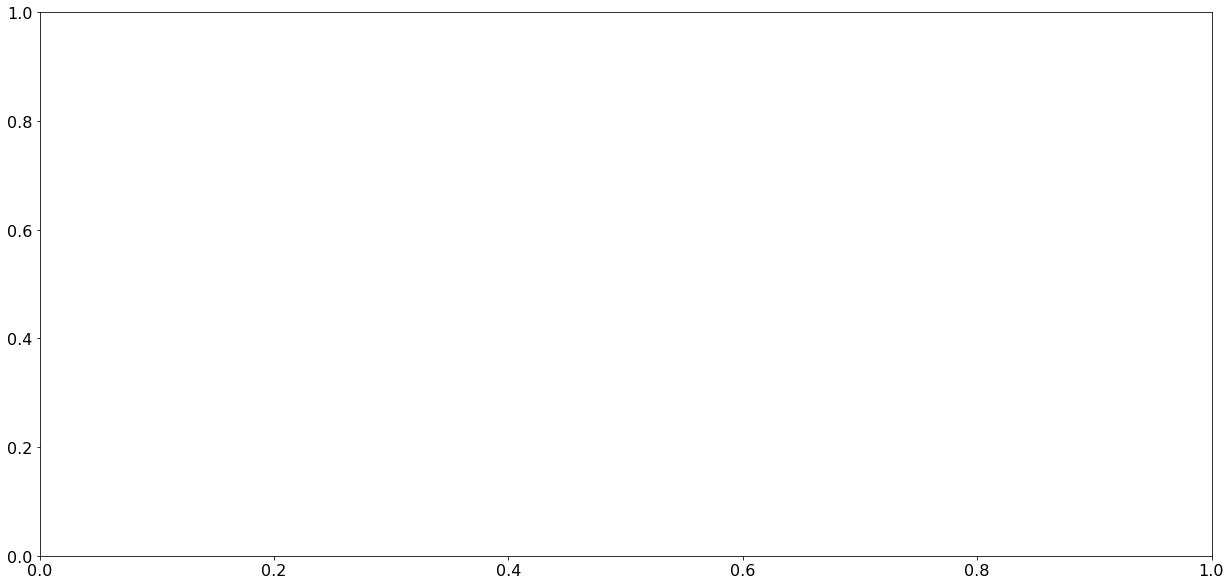

In [ ]:
from scipy.special import expi

In [ ]:
mu


In [ ]:
test=[nu(t) for t in linear_age]
test

In [ ]:
#EXPONENTIAL POWER DISTRIBUTION plot
s_max=0.145
expo_power_dist= lambda s: ((1.0/normalization[0])*np.exp(-((abs(s-s_peak))/d)**b))
linear_s=np.linspace(0,s_max,100)
plt.plot(linear_s,[u*expo_power_dist(s1) for s1 in linear_s])

In [ ]:
t=5
1-np.exp(-nu(t))-nu(t)*np.exp(-nu(t))

In [ ]:
density_theory=[(1-np.exp(-nu(t))-(nu(t))*(np.exp(-nu(t)))) for t in linear_age]

In [ ]:
def nu(t): 
    #normalized_rho_s= lambda s: (1.0/normalization[0])*np.exp(-((abs(s-s_peak))/d)**b)
    before_wrt_n= lambda n, s: n*(1-s)
    nu = integrate.dblquad(before_wrt_n, 0, 1)[0]
    return nu

In [ ]:
integrate.quad(expo_power_dist, 0, 1)[0]

In [ ]:
nu(120)

In [ ]:
integrate.dblquad(before_wrt_n, n_min, n_max, lambda s: 0, lambda s: s_max)

In [ ]:
t=1000
before_wrt_n= lambda n, s: pop_size*u*(1.0/normalization[0])*np.exp(-((abs(s-s_peak))/d)**b))/n*np.exp(-n/((np.exp(s*t)-1)/s))
before_wrt_l_log= lambda l, s: pop_size*u*np.exp(l)*((1.0/normalization[0])*np.exp(-((abs(s-s_peak))/d)**b))/np.exp(l)*np.exp(-np.exp(l)/((np.exp(s*t)-1)/s))
#nu = integrate.dblquad(before_wrt_n, n_min, n_min*4, lambda s: 0, lambda s: s_max)[0]
nu = integrate.dblquad(before_wrt_l_log, np.log(n_min), np.log(n_max), lambda s: 0, lambda s: s_max)[0]
nu

In [16]:
prob_separate_mutations[1200]

nan

In [17]:
prob_double_mutant[1200]

nan

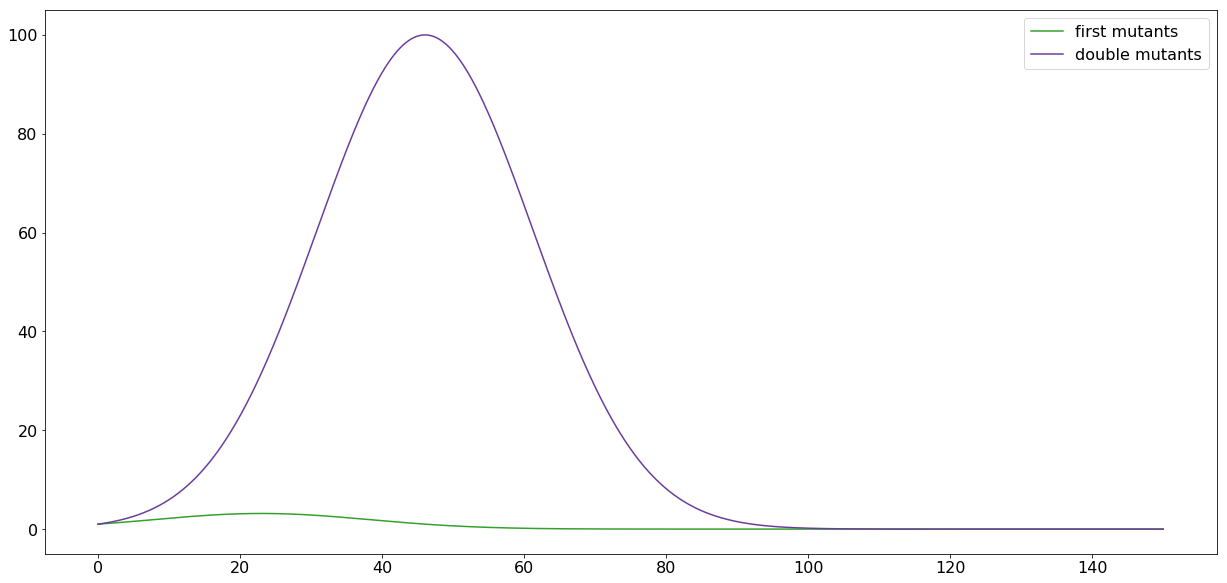

In [59]:
plt.close('all')
f, ax1 = plt.subplots(1, 1, figsize=(7*3,10))
plt.subplots_adjust(hspace = 0.7)  
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)


linear_age=np.linspace(0,150,1500)

v=2*s**2*np.log(N*s)/(np.log(s/u))**2
#first_mutant=[integrate.quad(lambda x: np.exp(((s-v*x)*x)), 0, t)[0] for t in linear_age]
#double_mutant=[integrate.quad(lambda x: np.exp(((2*s-v*x)*x)), 80, t)[0] for t in linear_age]
first_mutant=[(np.exp(((s-v*t)*t))) for t in linear_age]
double_mutant=[(np.exp(((2*s-v*t)*t))) for t in linear_age]

ax1.plot(linear_age, first_mutant, color=qualitative_10[3], label='first mutants')
ax1.plot(linear_age, double_mutant, color=qualitative_10[9], label='double mutants')
ax1.legend()

In [41]:
2*s/v

64.10536986722899

In [48]:
print(prob_double_mutant_function(149, VAF_lim, f_max))

11744.948081469238


In [49]:
u*10000*s

0.015

In [54]:
prob_multiple_singles_function(92, VAF_lim, f_max)

1.7187702985295168